In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder


In [4]:
df=pd.read_csv(r"D:\Academy\MSP\MSP Project\MSP-AI-Committee\Preprocessing Mini Contest\data.csv")


In [5]:
df.head()


,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1


In [6]:
df["OS"].value_counts()

OS
Windows 11 OS         782
Windows 10 OS          28
DOS OS                 18
Windows 11  OS         15
Mac OS                 12
Windows 10  OS         10
Chrome OS              10
Windows OS              9
Mac 10.15.3\t OS        2
Ubuntu OS               2
DOS 3.0 OS              2
Android 11 OS           1
Mac Catalina OS         1
Mac High Sierra OS      1
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    int64  
 15  resolution_height  893 non-null    int64  
 16  OS                 893 non

In [8]:
df.drop(columns=['Unnamed: 0.1',"Unnamed: 0"],inplace=True)


In [9]:

df['price'] = df['price'].astype(float)

# Convert RAM to integer (remove "GB" using regex)
df['Ram'] = df['Ram'].str.replace(r'\D', '', regex=True).astype(int)

# Convert ROM to integer (remove "GB" and convert "1TB" to 1024GB)
df['ROM'] = df['ROM'].str.replace(r'GB', '', regex=True)  # Remove "GB"
df['ROM'] = df['ROM'].str.replace(r'(\d+)TB', lambda m: str(int(m.group(1)) * 1024), regex=True)  # Convert "1TB" to "1024"
df['ROM'] = df['ROM'].astype(int)  # Convert to integer






In [10]:
df['spec_rating']=df['spec_rating'].round(1)

In [11]:
df['OS']=df['OS'].replace({'Windows 11  OS':'Windows 11 OS','Windows 10  OS':'Windows 10 OS'})

In [12]:
df['resolution']=df['resolution_height']*df['resolution_width']
df.drop(['resolution_height','resolution_width'],axis=1,inplace=True)

In [13]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,resolution
0,HP,Victus 15-fb0157AX Gaming Laptop,49900.0,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,Windows 11 OS,1,2073600
1,HP,15s-fq5007TU Laptop,39900.0,60.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,Windows 11 OS,1,2073600
2,Acer,One 14 Z8-415 Laptop,26990.0,69.3,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,Windows 11 OS,1,2073600
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729.0,66.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,Windows 11 OS,1,3136000
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990.0,69.3,Apple M1,Octa Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,Mac OS,1,4096000


In [14]:
df['OS'].value_counts()

OS
Windows 11 OS         797
Windows 10 OS          38
DOS OS                 18
Mac OS                 12
Chrome OS              10
Windows OS              9
DOS 3.0 OS              2
Ubuntu OS               2
Mac 10.15.3\t OS        2
Android 11 OS           1
Mac Catalina OS         1
Mac High Sierra OS      1
Name: count, dtype: int64

In [15]:
df['OS']=df['OS'].replace(['Mac High Sierra OS','Mac Catalina OS','Mac 10.15.3\t OS'],'Mac OS')
df['OS']=df['OS'].replace('DOS 3.0 OS','DOS OS')
df['OS']=df['OS'].replace(['Android 11 OS','Ubuntu OS','Chrome OS'],'others')

In [16]:
median_price = df["price"].median()
df.loc[(df["OS"] == "Windows OS") & (df["price"] > median_price), "OS"] = "Windows 11 OS"
df.loc[(df["OS"] == "Windows OS") & (df["price"] <= median_price), "OS"] = "Windows 10 OS"

In [17]:
df['OS'].value_counts()

OS
Windows 11 OS    798
Windows 10 OS     46
DOS OS            20
Mac OS            16
others            13
Name: count, dtype: int64

In [18]:
df['GPU'].value_counts()

GPU
Intel Iris Xe Graphics          107
Intel UHD Graphics               63
Intel Integrated UHD             61
AMD Radeon AMD                   55
AMD Radeon Graphics              54
                               ... 
2GB NVIDIA GeForce MX570          1
4GB NVIDIA GeForce GTX 1650       1
6GB NVIDIA GEFORCE RTX 4050       1
Intel UHD Integrated              1
4GB AMD Radeon RX 5600M           1
Name: count, Length: 134, dtype: int64

In [19]:
df['CPU']=df['CPU'].str.replace(r'Dual','2',regex=True)
df['CPU']=df['CPU'].str.replace(r'Hexa','6',regex=True)
df['CPU']=df['CPU'].str.replace(r'Octa','8',regex=True)
df['CPU']=df['CPU'].str.replace(r'Quad','4',regex=True)

In [20]:
df['CPU'].value_counts()

CPU
4 Core, 8 Threads                  130
6 Core, 12 Threads                 126
10 Cores (2P + 8E), 12 Threads     125
8 Core, 16 Threads                 102
12 Cores (4P + 8E), 16 Threads      83
2 Core, 4 Threads                   55
14 Cores (6P + 8E), 20 Threads      50
6 Core (2P + 4E), 8 Threads         44
8 Core (4P + 4E), 12 Threads        43
2 Core, 2 Threads                   36
10 Cores (6P + 4E), 16 Threads      26
24 Cores (8P + 16E), 32 Threads     16
16 Cores (8P + 8E), 24 Threads      10
14 Cores (6P + 8E)                   9
5 Cores (1P + 4E), 6 Threads         7
8 Core (4P + 4E)                     5
8 Core, 8 Threads                    4
4 Core, 4 Threads                    4
8 Core                               3
12 Cores                             2
4 Core                               2
10 Cores                             2
10 Cores (8P + 2E)                   2
10 Cores, 12 Threads                 2
14 Cores, 20 Threads                 1
16 Cores, 32 Threads 

In [21]:
df['Cores'] = df['CPU'].str.extract(r'(\d+) Cores?')
df['Threads'] = df['CPU'].str.extract(r'(\d+) Threads?')
df[['Cores', 'Threads']] = df[['Cores', 'Threads']].astype(float)

In [22]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,resolution,Cores,Threads
0,HP,Victus 15-fb0157AX Gaming Laptop,49900.0,73.0,5th Gen AMD Ryzen 5 5600H,"6 Core, 12 Threads",8,DDR4,512,SSD,4GB AMD Radeon RX 6500M,15.6,Windows 11 OS,1,2073600,6.0,12.0
1,HP,15s-fq5007TU Laptop,39900.0,60.0,12th Gen Intel Core i3 1215U,"6 Core (2P + 4E), 8 Threads",8,DDR4,512,SSD,Intel UHD Graphics,15.6,Windows 11 OS,1,2073600,6.0,8.0
2,Acer,One 14 Z8-415 Laptop,26990.0,69.3,11th Gen Intel Core i3 1115G4,"2 Core, 4 Threads",8,DDR4,512,SSD,Intel Iris Xe Graphics,14.0,Windows 11 OS,1,2073600,2.0,4.0
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729.0,66.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512,SSD,Intel Integrated Iris Xe,14.0,Windows 11 OS,1,3136000,12.0,16.0
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990.0,69.3,Apple M1,8 Core (4P + 4E),8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,Mac OS,1,4096000,8.0,NaN


In [23]:
df['Ram_type'].value_counts()

Ram_type
DDR4       499
DDR5       166
LPDDR5     145
LPDDR4X     41
LPDDR4      14
LPDDR4x     13
Unified      7
DDR3         3
LPDDR5X      2
DDR4-        1
LPDDR5x      1
DDR          1
Name: count, dtype: int64

In [24]:
df['Ram_type']=df['Ram_type'].replace({'LPDDR4x':'LPDDR4X','LPDDR5x':'LPDDR5X'})
df['Ram_type']=df['Ram_type'].replace(['DDR','DDR4-','Unified'],'others')
df['Ram_type']=df['Ram_type'].replace('LPDDR5X','LPDDR5X')


In [25]:
df.drop(df[df["Ram_type"] == "DDR3"].index, inplace=True)
df.drop(df[df["Ram_type"] == "others"].index, inplace=True)
df.drop(df[df["Ram_type"] == "LPDDR5X"].index, inplace=True)

In [26]:
df['Ram_type'].value_counts()

Ram_type
DDR4       499
DDR5       166
LPDDR5     145
LPDDR4X     54
LPDDR4      14
Name: count, dtype: int64

In [27]:



# 3️⃣ Extract GPU Details
df['GPU_Memory'] = df['GPU'].str.extract(r'(\d+)GB', expand=False).fillna(0).astype(float)
df['GPU_Brand'] = df['GPU'].str.extract(r'(Intel|NVIDIA|AMD|Apple)', expand=False).fillna('Unknown')
df['GPU_Model'] = df['GPU'].str.replace(r'\d+GB ', '', regex=True)
df['GPU_Model'] = df['GPU_Model'].str.replace(r'(Intel|NVIDIA|AMD|Apple) ', '', regex=True)


In [28]:
df['spec_rating'].min()

np.float64(60.0)

In [29]:
df_filtring= df.filter(items=['price','spec_rating','Threads','Cores','resolution','display_size','GPU','ROM','Ram','CPU','processor','Ram_type'])

In [30]:
df['price'].describe()
# five number for price

count       878.000000
mean      78607.859909
std       59416.000727
min       10990.000000
25%       43999.250000
50%       61240.000000
75%       89996.750000
max      450039.000000
Name: price, dtype: float64

In [31]:
df['spec_rating'].describe()
# five number for spec_rating

count    878.000000
mean      69.404556
std        5.560680
min       60.000000
25%       66.000000
50%       69.300000
75%       71.000000
max       89.000000
Name: spec_rating, dtype: float64

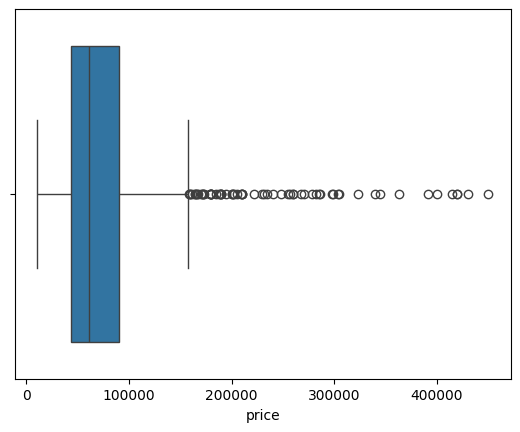

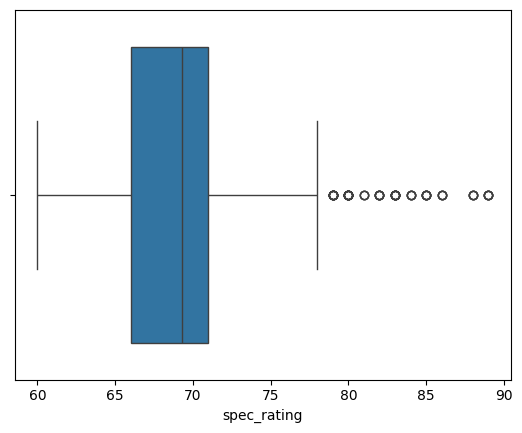

In [32]:
sns.boxplot(data=df['price'],orient='h')
plt.show()
# boxplot for price
sns.boxplot(data=df["spec_rating"],orient="h")
plt.show()
# boxplot for spec_rating

In [33]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df=df[(df['price']>=lower) & (df['price']<=upper)]


In [34]:
Q1=df['spec_rating'].quantile(0.25)
Q3=df['spec_rating'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df=df[(df['spec_rating']>=lower) & (df['spec_rating']<=upper)]


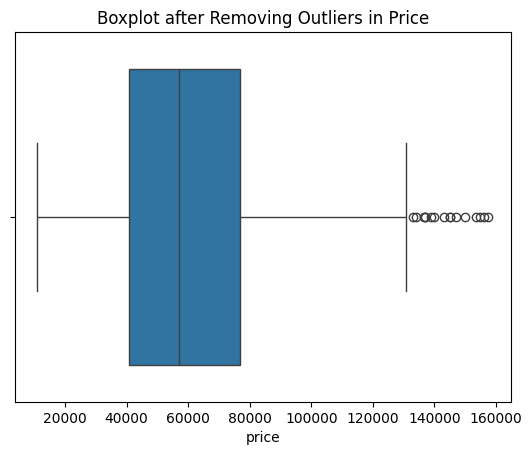

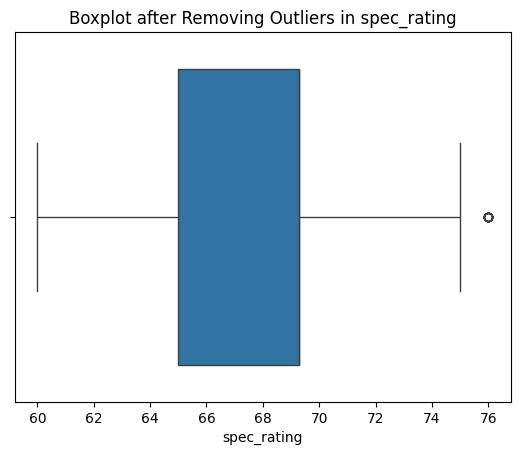

In [35]:
df_cleaned=df.copy()
sns.boxplot(data=df_cleaned['price'],orient='h')
plt.title("Boxplot after Removing Outliers in Price")
plt.show()
sns.boxplot(data=df_cleaned['spec_rating'],orient='h')
plt.title("Boxplot after Removing Outliers in spec_rating")


plt.show()

<Axes: xlabel='price', ylabel='Count'>

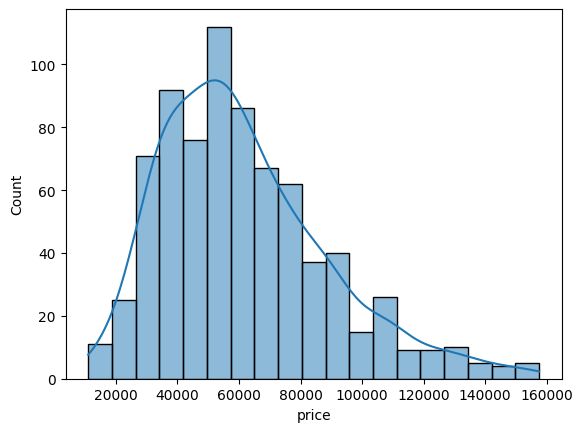

In [36]:
sns.histplot(df_cleaned["price"],kde=True)
# hisplot for price
# right skewed

<Axes: xlabel='log price ', ylabel='Count'>

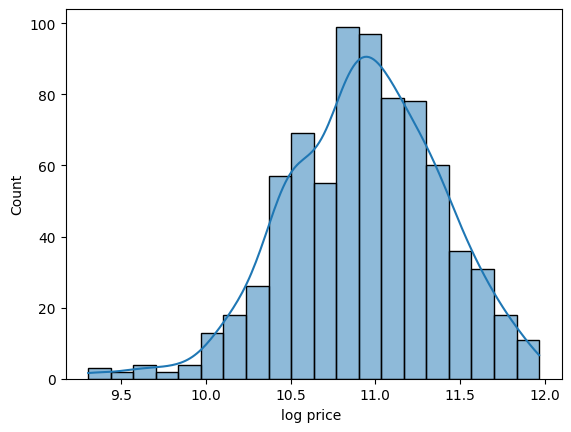

In [37]:
df_cleaned["log price "]=np.log(df_cleaned["price"])
sns.histplot(df_cleaned['log price '],kde=True)
# histplot after Transformation


<Axes: xlabel='spec_rating', ylabel='Count'>

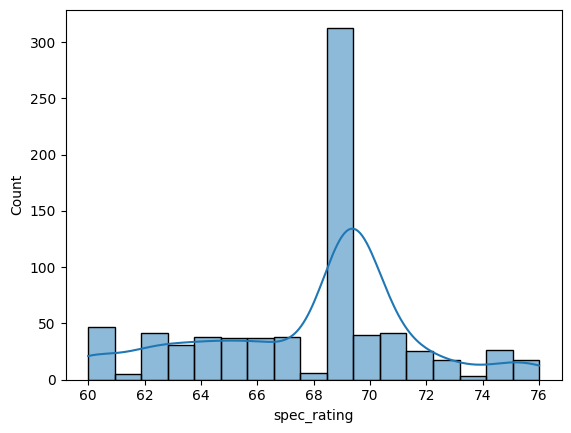

In [38]:
sns.histplot(df['spec_rating'],kde=True)

In [39]:
df_filtring

,price,spec_rating,Threads,Cores,resolution,display_size,GPU,ROM,Ram,CPU,processor,Ram_type
0,49900.0,73.0,12.0,6.0,2073600,15.6,4GB AMD Radeon RX 6500M,512,8,"6 Core, 12 Threads",5th Gen AMD Ryzen 5 5600H,DDR4
1,39900.0,60.0,8.0,6.0,2073600,15.6,Intel UHD Graphics,512,8,"6 Core (2P + 4E), 8 Threads",12th Gen Intel Core i3 1215U,DDR4
2,26990.0,69.3,4.0,2.0,2073600,14.0,Intel Iris Xe Graphics,512,8,"2 Core, 4 Threads",11th Gen Intel Core i3 1115G4,DDR4
3,59729.0,66.0,16.0,12.0,3136000,14.0,Intel Integrated Iris Xe,512,16,"12 Cores (4P + 8E), 16 Threads",12th Gen Intel Core i5 1240P,LPDDR5
4,69990.0,69.3,NaN,8.0,4096000,13.3,Apple M1 Integrated Graphics,256,8,8 Core (4P + 4E),Apple M1,DDR4
...,...,...,...,...,...,...,...,...,...,...,...,...
887,56990.0,69.3,12.0,10.0,2073600,15.6,Intel Integrated Iris Xe,512,16,"10 Cores (2P + 8E), 12 Threads",13th Gen Intel Core i5 1335U,LPDDR5
888,44990.0,69.3,8.0,6.0,2073600,15.6,Integrated Intel UHD Graphics,512,8,"6 Core (2P + 4E), 8 Threads",13th Gen ‎Intel Core i3 1315U,DDR4
890,189990.0,89.0,16.0,8.0,4096000,14.0,8GB NVIDIA GeForce RTX 4060,1024,32,"8 Core, 16 Threads",7th Gen AMD Ryzen 9 7940HS,DDR5
891,129990.0,73.0,20.0,14.0,2073600,15.6,6GB NVIDIA GeForce RTX 4050,512,16,"14 Cores (6P + 8E), 20 Threads",13th Gen Intel Core i7 13700H,DDR4


C:\Users\mosta\AppData\Local\Temp\ipykernel_13756\204212332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_price_avg.index, y=os_price_avg.values, palette="viridis")


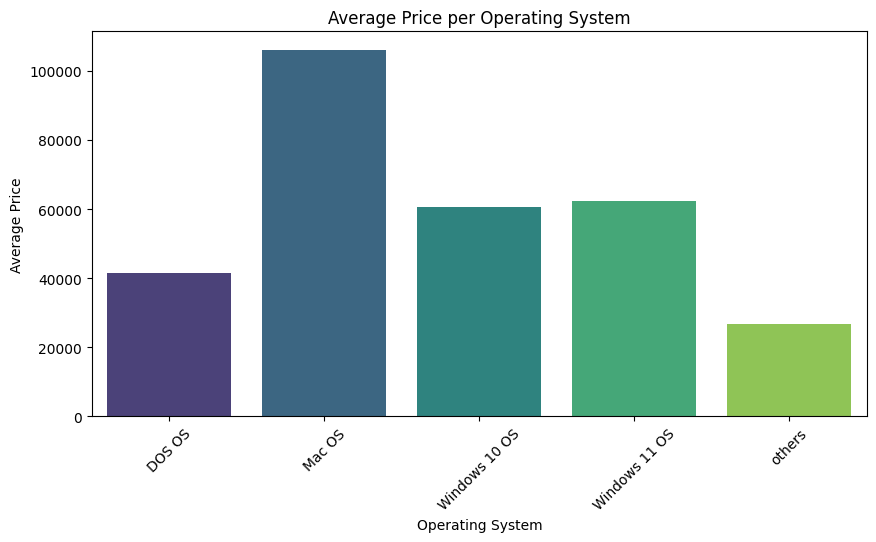

In [40]:
os_price_avg = df.groupby("OS")["price"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=os_price_avg.index, y=os_price_avg.values, palette="viridis")
plt.xlabel("Operating System")
plt.ylabel("Average Price")
plt.title("Average Price per Operating System")
plt.xticks(rotation=45)
plt.show()

In [41]:
df_filtring.drop(columns='GPU',inplace=True)

In [43]:
df_filtring.head(30)

,price,spec_rating,Threads,Cores,resolution,display_size,ROM,Ram,CPU,processor,Ram_type
0,49900.0,73.0,12.0,6.0,2073600,15.6,512,8,"6 Core, 12 Threads",5th Gen AMD Ryzen 5 5600H,DDR4
1,39900.0,60.0,8.0,6.0,2073600,15.6,512,8,"6 Core (2P + 4E), 8 Threads",12th Gen Intel Core i3 1215U,DDR4
2,26990.0,69.3,4.0,2.0,2073600,14.0,512,8,"2 Core, 4 Threads",11th Gen Intel Core i3 1115G4,DDR4
3,59729.0,66.0,16.0,12.0,3136000,14.0,512,16,"12 Cores (4P + 8E), 16 Threads",12th Gen Intel Core i5 1240P,LPDDR5
4,69990.0,69.3,NaN,8.0,4096000,13.3,256,8,8 Core (4P + 4E),Apple M1,DDR4
5,39990.0,62.0,16.0,12.0,2073600,14.0,512,8,"12 Cores (4P + 8E), 16 Threads",12th Gen Intel Core i5 1240P,DDR4
6,36790.0,60.0,8.0,6.0,2073600,15.6,512,8,"6 Core (2P + 4E), 8 Threads",12th Gen Intel Core i3 1215U,DDR4
7,76990.0,63.0,12.0,8.0,2073600,15.6,512,16,"8 Core (4P + 4E), 12 Threads",13th Gen Intel Core i5 13420H,DDR5
8,48990.0,64.0,16.0,12.0,2073600,15.6,512,8,"12 Cores (4P + 8E), 16 Threads",12th Gen Intel Core i5 12500H,DDR4
9,74990.0,68.0,16.0,12.0,2073600,13.3,512,16,"12 Cores (4P + 8E), 16 Threads",12th Gen Intel Core i5 1240P,LPDDR5


In [48]:
processor_order = df_filtring['processor'].unique().tolist()
desired_order = [
    "3rd Gen AMD Ryzen 5 3500U",
    "5th Gen AMD Ryzen 5 5625U",
    "5th Gen AMD Ryzen 7 5825U",
    "11th Gen Intel Core i3 1115G4",
    "12th Gen Intel Core i3 1215U",
    "12th Gen Intel Core i5 1235U",
    "13th Gen Intel Core i5 1335U",
]
for processor in processor_order:
    if processor not in desired_order:
        desired_order.append(processor)
encoder = OrdinalEncoder(categories=[desired_order], handle_unknown='use_encoded_value', unknown_value=-1)
df_filtring[["processor"]] = encoder.fit_transform(df_filtring[["processor"]])

In [49]:
df['processor'].unique()

array([  7.,   4.,   3.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,   1.,  32.,  33.,   5.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,   6.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140.,   2., 141., 142., 143.,
       144., 145., 146.,   0., 147., 148., 149., 15

In [60]:
ordinal_columns = [ "Ram_type"]
ordinal_encoder = OrdinalEncoder()
df_filtring[ordinal_columns] = ordinal_encoder.fit_transform(df_filtring[ordinal_columns])
print(df_filtring.head())

     price  spec_rating  Threads  Cores  resolution  display_size  ROM  Ram  \
0  49900.0         73.0     12.0    6.0     2073600          15.6  512    8   
1  39900.0         60.0      8.0    6.0     2073600          15.6  512    8   
2  26990.0         69.3      4.0    2.0     2073600          14.0  512    8   
3  59729.0         66.0     16.0   12.0     3136000          14.0  512   16   
4  69990.0         69.3      NaN    8.0     4096000          13.3  256    8   

                              CPU  processor  Ram_type  
0              6 Core, 12 Threads        7.0       0.0  
1     6 Core (2P + 4E), 8 Threads        4.0       0.0  
2               2 Core, 4 Threads        3.0       0.0  
3  12 Cores (4P + 8E), 16 Threads        8.0       4.0  
4                8 Core (4P + 4E)        9.0       0.0  


In [63]:
df_filtring.drop(columns="CPU",inplace=True)

In [64]:
df_filtring

,price,spec_rating,Threads,Cores,resolution,display_size,ROM,Ram,processor,Ram_type
0,49900.0,73.0,12.0,6.0,2073600,15.6,512,8,7.0,0.0
1,39900.0,60.0,8.0,6.0,2073600,15.6,512,8,4.0,0.0
2,26990.0,69.3,4.0,2.0,2073600,14.0,512,8,3.0,0.0
3,59729.0,66.0,16.0,12.0,3136000,14.0,512,16,8.0,4.0
4,69990.0,69.3,NaN,8.0,4096000,13.3,256,8,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...
887,56990.0,69.3,12.0,10.0,2073600,15.6,512,16,6.0,4.0
888,44990.0,69.3,8.0,6.0,2073600,15.6,512,8,174.0,0.0
890,189990.0,89.0,16.0,8.0,4096000,14.0,1024,32,145.0,1.0
891,129990.0,73.0,20.0,14.0,2073600,15.6,512,16,87.0,0.0


In [65]:
fig=px.scatter(df_filtring,x="price",y="spec_rating")
fig.update_layout(width=800, height=600)
fig.show()

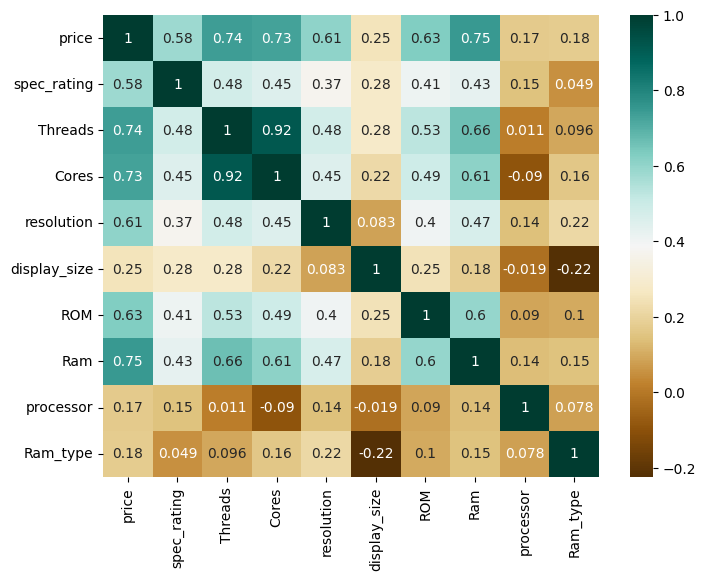

In [66]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_filtring.corr(), annot=True, cmap='BrBG')
plt.show()

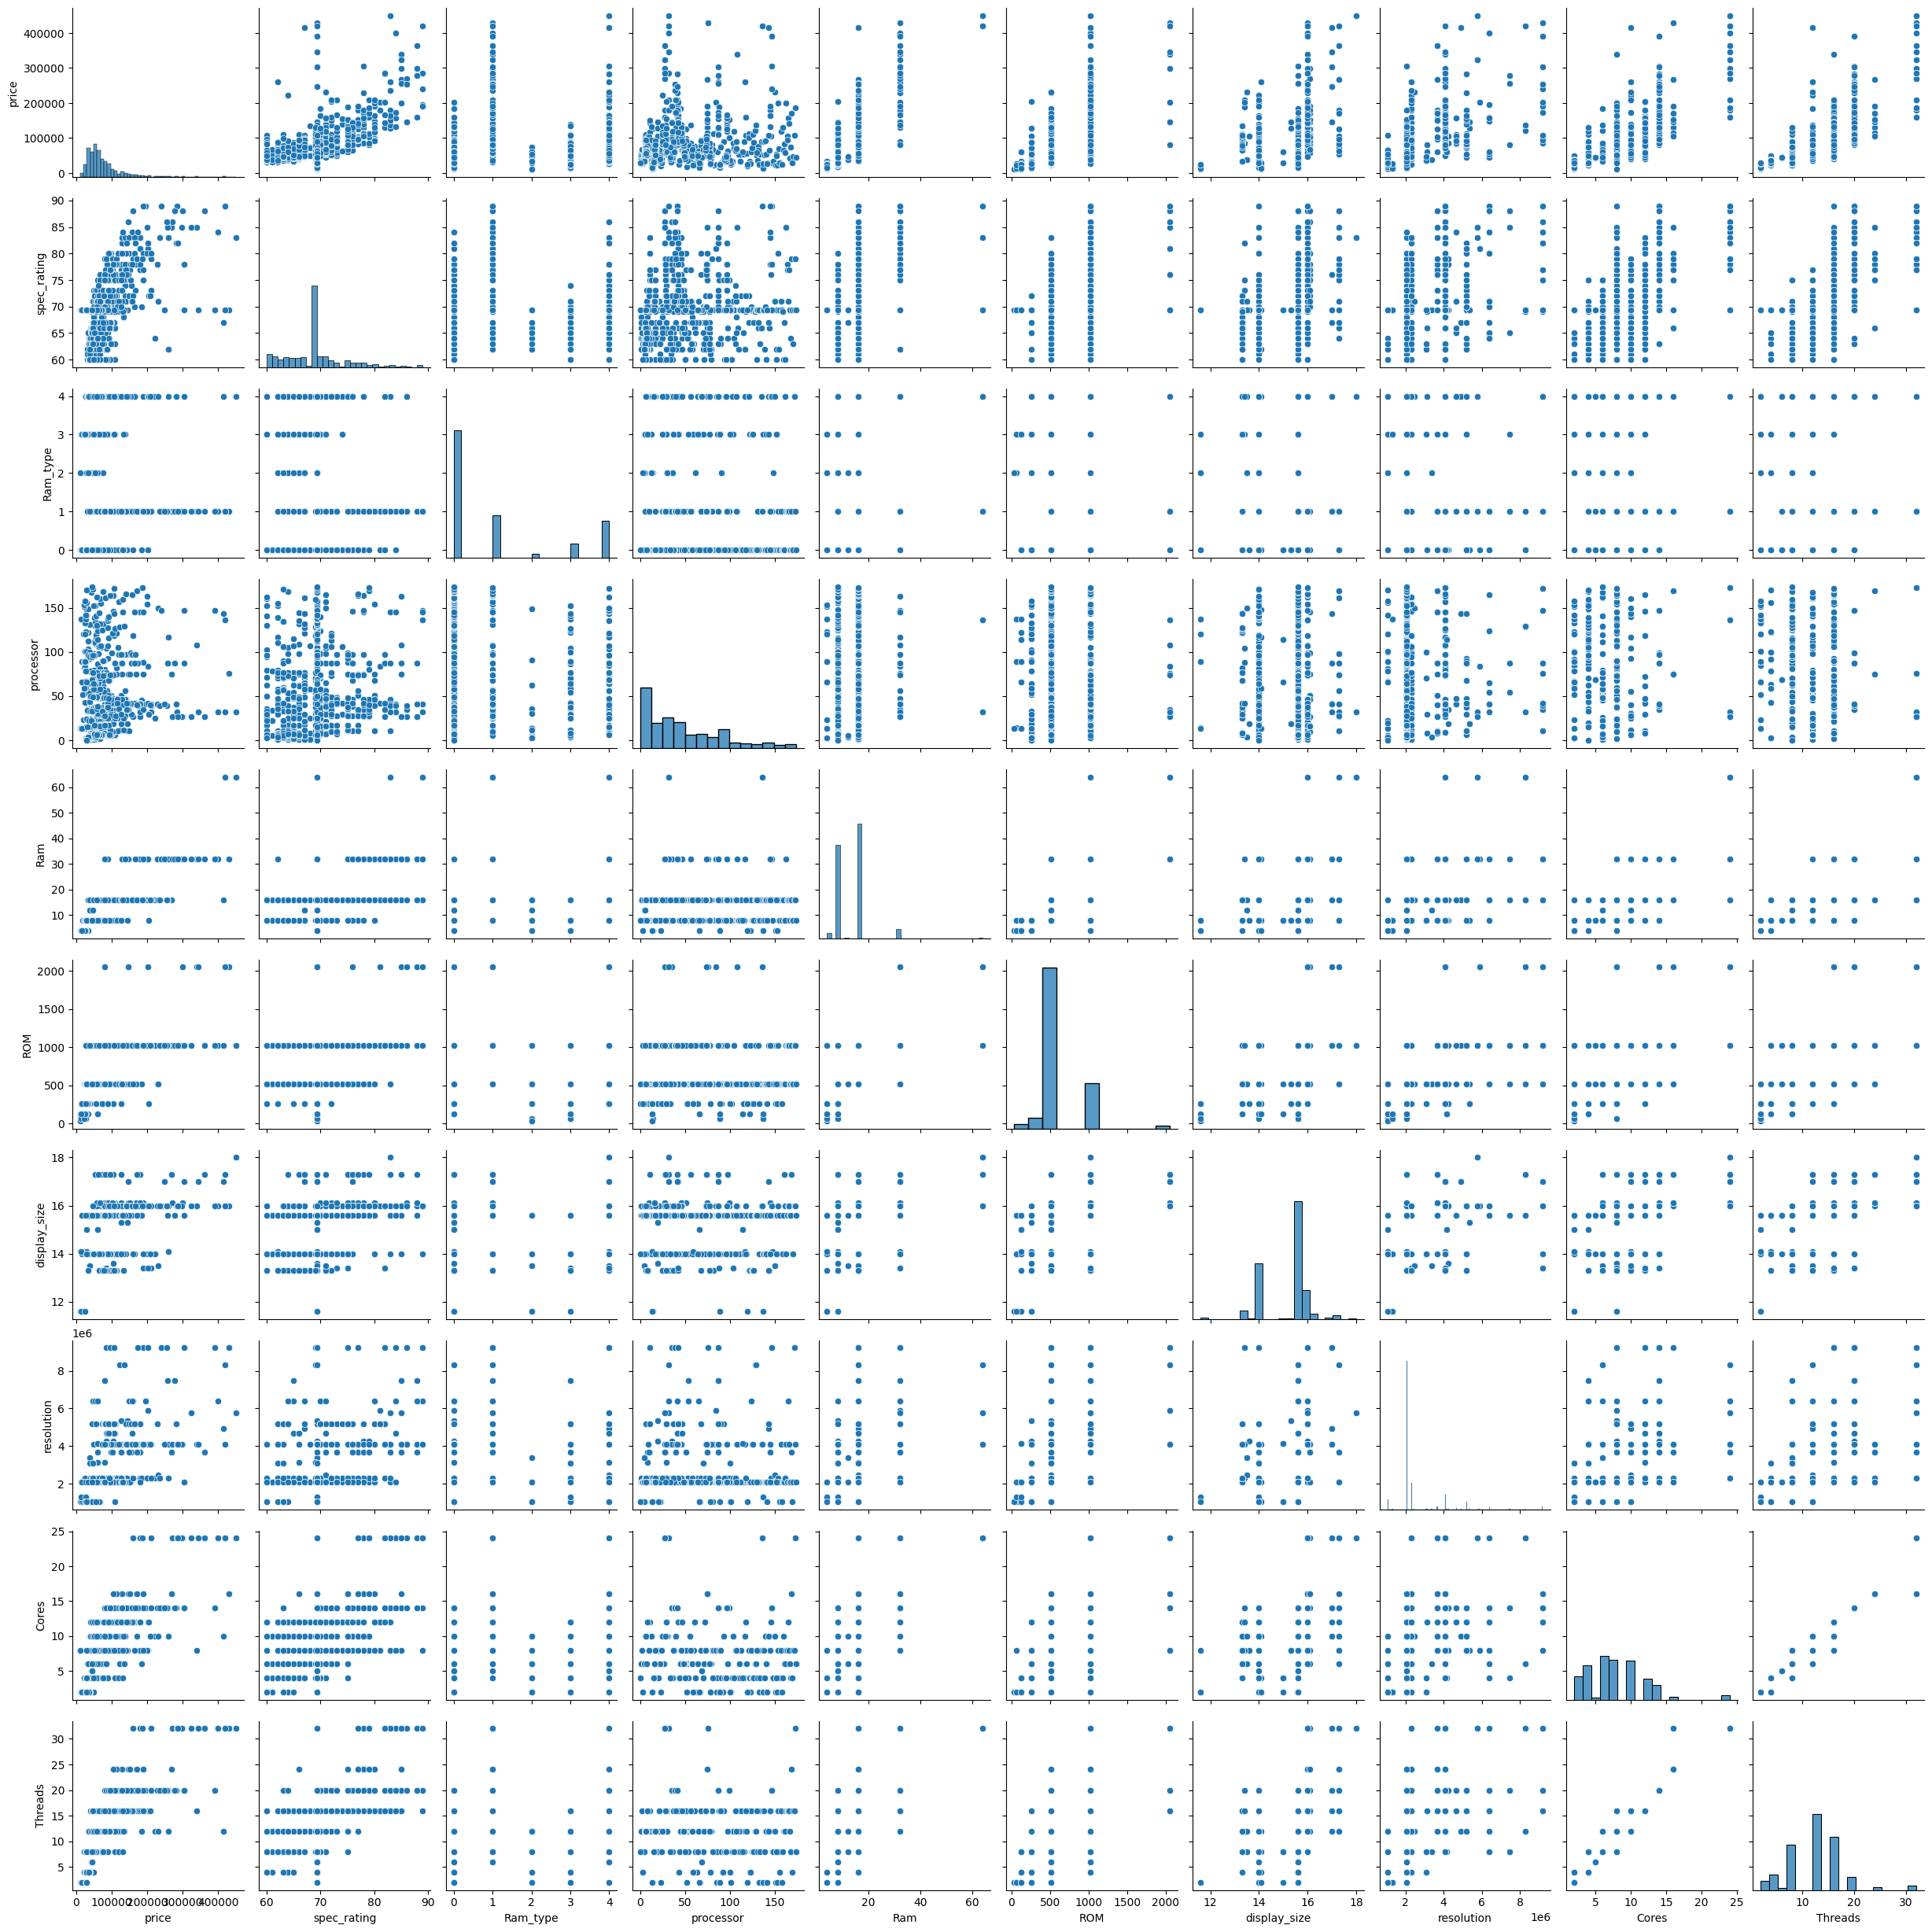

<Figure size 600x400 with 0 Axes>

In [70]:
sns.pairplot(df_filtring[['price','spec_rating','Ram_type',"processor",'Ram','ROM','display_size','resolution','Cores','Threads']], kind='scatter')
plt.figure(figsize=(6,4))
plt.show()

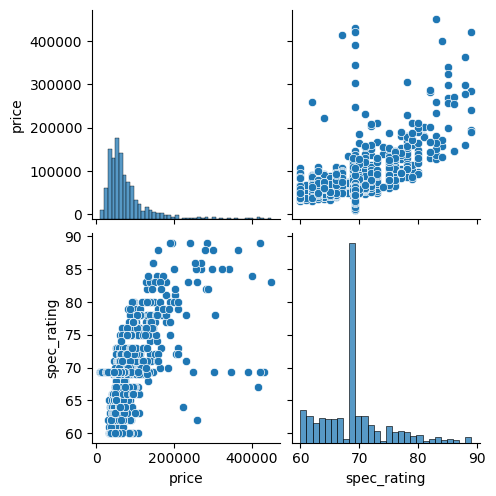

In [71]:
sns.pairplot(df_filtring[['price', 'spec_rating']])
plt.show()

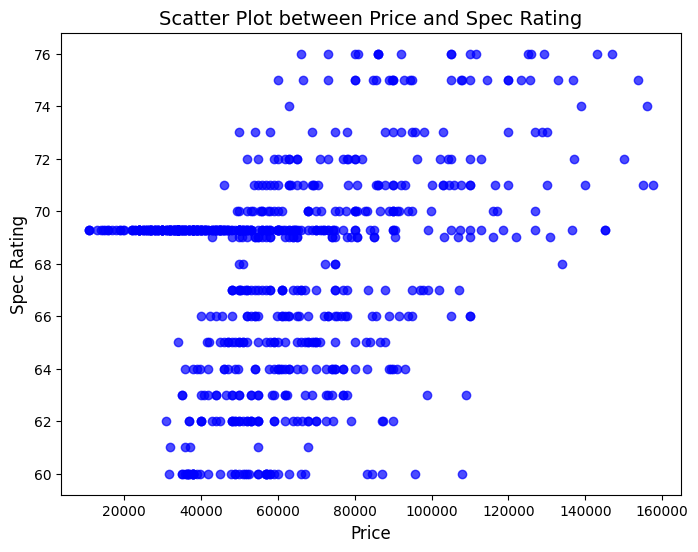

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['spec_rating'], alpha=0.7, color='blue')
plt.title('Scatter Plot between Price and Spec Rating', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Spec Rating', fontsize=12)
plt.show()

<Figure size 1500x1000 with 0 Axes>

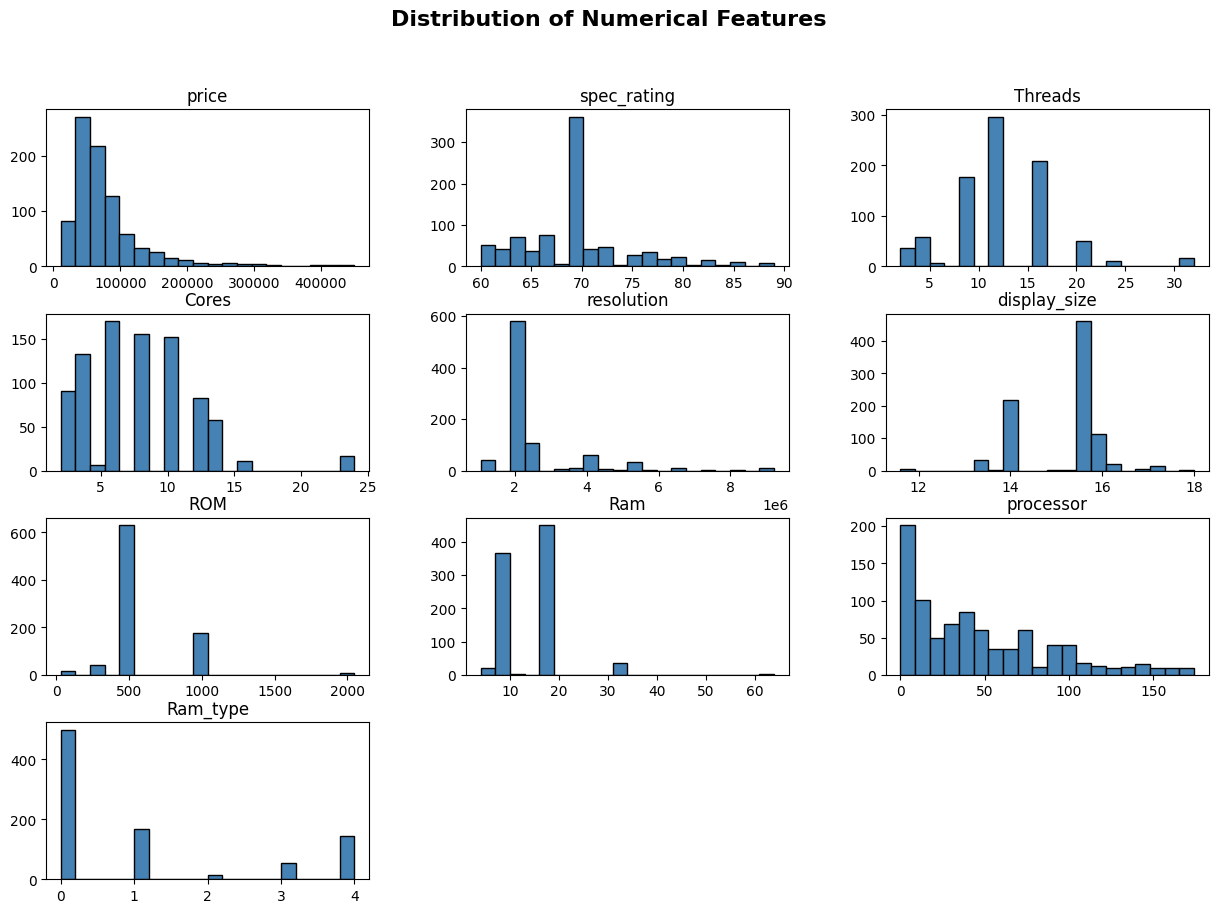

In [74]:
plt.figure(figsize=(15, 10))
df_filtring.hist(figsize=(15, 10), bins=20, color='steelblue', edgecolor='black', grid=False)
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold')
plt.show()